In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convirtiendo una lista en un Pandas Series
list = [2,4,6,8]
serie = pd.Series(list)

# Convirtiendo un Pandas Series en una lista
serieList = serie.tolist()

# Creando un DataFrame con un diccionario
dicc = {"Name": ["Alexis","Joaquin","Maria","Patrick","Yohan"],
        "LastName": ["Zambrano","Torrejon","Chavesta","Jane","Rodr"],
        "Age": [np.random.randint(15,30) for x in range(5)]}

df = pd.DataFrame(dicc)
print(df)

      Name  LastName  Age
0   Alexis  Zambrano   16
1  Joaquin  Torrejon   16
2    Maria  Chavesta   16
3  Patrick      Jane   25
4    Yohan      Rodr   28


In [15]:
# Creando a CSV
dicc = {"Name": ["Alexis","Joaquin","Maria","Patrick","Yohan"],
        "LastName": ["Zambrano","Torrejon","Chavesta","Jane","Rodr"],
        "Age": [np.random.randint(15,30) for x in range(5)]}
df = pd.DataFrame(dicc)
df.to_csv("archivos_csv/datos.csv",index=False)

#Abriendo CSV
df = pd.read_csv("archivos_csv/datos.csv")

# Mostrando filas y columnas que tiene nuestro DataFrame
fil_col = df.shape
print(f"El DataFrame tiene {fil_col[0]} filas y {fil_col[1]} columnas")

#Mostrando nombres de columnas de nuestro DataFrame
col = df.columns
print(col)

El DataFrame tiene 5 filas y 3 columnas
Index(['Name', 'LastName', 'Age'], dtype='object')


In [8]:
dicc = {
    "nombre": ["Juan","Ana","Luis","Marta"],
    "edad": [25,30,22,29],
    "ciudad": ["Madrid","Barcelona","Valencia","Sevilla"]
}

df = pd.DataFrame(dicc)

# Mostrando filas donde la edad sea mayor a 25 años.
condicion = df['edad'] > 25
print(f"{df[condicion]}\n")

# Añadiendo más datos al dataframe. Haremos uso de reset_index para evitar indices repetidos y "drop=True" para evitar que el antiguo indice se guarde y conserve solo el nuevo.
new = pd.DataFrame([{'nombre': 'Axis', 'edad': 19, 'ciudad': 'Guadalajara'}])
df = pd.concat([df,new])
df.reset_index(drop=True)
print(f"{df}\n")

# Cambiando el nombre de la columna "Ciudad" a "Ubicación".
df.rename(columns={'ciudad':'ubicación'},inplace=True)
print(f"{df}\n")

# Añadiendo un año más de longevidad a las personas.
df['edad'] = df['edad'] + 1
print (f"{df}\n")

  nombre  edad     ciudad
1    Ana    30  Barcelona
3  Marta    29    Sevilla

  nombre  edad       ciudad
0   Juan    25       Madrid
1    Ana    30    Barcelona
2   Luis    22     Valencia
3  Marta    29      Sevilla
0   Axis    19  Guadalajara

  nombre  edad    ubicación
0   Juan    25       Madrid
1    Ana    30    Barcelona
2   Luis    22     Valencia
3  Marta    29      Sevilla
0   Axis    19  Guadalajara

  nombre  edad    ubicación
0   Juan    26       Madrid
1    Ana    31    Barcelona
2   Luis    23     Valencia
3  Marta    30      Sevilla
0   Axis    20  Guadalajara



In [12]:
data = {
    'Producto': ["Laptop","Smartphone","Ropa","Zapatos"],
    'Categoria': ["Electronica","Electronica","Moda","Moda"],
    'Ventas': [1200,800,300,150],
} 

df = pd.DataFrame(data)

# Ordenando ventas de menor a mayor.
df_ord_desc = df.sort_values(by='Ventas', ascending=False)
print(f"{df_ord_desc}\n")

# Calculando el promedio de las ventas.
ingresos = df['Ventas'].sum()
ventas_totales = df['Ventas'].count()
promedio_de_ventas = ingresos / ventas_totales
print(f"Promedio de ventas: {promedio_de_ventas}")

     Producto    Categoria  Ventas
0      Laptop  Electronica    1200
1  Smartphone  Electronica     800
2        Ropa         Moda     300
3     Zapatos         Moda     150

Promedio de ventas: 612.5


In [17]:
df = pd.read_csv("archivos_csv/estudiantes.csv")

# Filtros
c1 = df['Edad'] > 18
c2 = df['Matematicas'] > 70

# Creamos una copia del DataFrame original filtrando por Edad mayor a 18 y calificación en Matematicas mayor a 70
df_copia = df.where(c1 & c2)

# Limpiamos los valores que no cumplan con las condiciones (NaN)
df_final = df_copia.dropna()
print(df_final)

   Nombre  Edad  Matematicas  Ciencias
1     Ana  22.0         78.0      82.0
2    Luis  19.0         92.0      87.0
3   Marta  21.0         74.0      79.0
4  Carlos  20.0         88.0      85.0


In [19]:
df = pd.read_csv('archivos_csv/ventas.csv')

# Agrupando por Tiendas y obteniendo las ventas totales de las mismas. Asignamos un alias a la columna resultante del total de ventas.
ventas_totales = df.groupby('Tienda').sum()['Ventas'].rename('Total de Ventas')

print(ventas_totales)

Tienda
Tienda_A    2300
Tienda_B    1700
Tienda_C     550
Tienda_D    1170
Name: Total de Ventas, dtype: int64


In [21]:
df = pd.read_csv('archivos_csv/empleados.csv')

# Añadiendo una columa con el total del salario + la bonificacion. Ordenamos de mayor a menor.
df['Total Pago'] = df['Salario'] + df['Bonificacion']
print(df.sort_values(by="Total Pago", ascending=False))

   Nombre  Salario  Bonificacion  Total Pago
3   Marta    45000          7500       52500
1     Ana    42000          7000       49000
2    Luis    39000          6000       45000
4    Juan    38000          5500       43500
0  Carlos    35000          5000       40000


In [27]:
df = pd.read_csv('archivos_csv/temperaturas.csv')

# Calculando MEDIA, MEDIANA Y DESVIACIÓN ESTANDAR de la temperatura para cada ciudad.
df["Media"] = df.groupby("Ciudad")["Temperatura"].transform('mean')
df["Mediana"] = df.groupby("Ciudad")["Temperatura"].transform('median')
df["Desviacion Estandar"] = df.groupby("Ciudad")["Temperatura"].transform('std')

# Mostramos solo las columnas necesarias y limpiamos valores duplicados.
print(f"{df[["Ciudad","Media","Mediana","Desviacion Estandar"]].drop_duplicates('Ciudad')}\n")

print(df)

       Ciudad      Media  Mediana  Desviacion Estandar
0      Madrid  30.142857     30.0             1.345185
7   Barcelona  28.142857     28.0             1.345185
14   Valencia  32.428571     33.0             1.511858
21    Sevilla  34.428571     35.0             1.511858
28     Bilbao  24.428571     25.0             1.511858

       Ciudad        Dia  Temperatura      Media  Mediana  Desviacion Estandar
0      Madrid      Lunes           30  30.142857     30.0             1.345185
1      Madrid     Martes           32  30.142857     30.0             1.345185
2      Madrid  Miércoles           31  30.142857     30.0             1.345185
3      Madrid     Jueves           29  30.142857     30.0             1.345185
4      Madrid    Viernes           28  30.142857     30.0             1.345185
5      Madrid     Sábado           30  30.142857     30.0             1.345185
6      Madrid    Domingo           31  30.142857     30.0             1.345185
7   Barcelona      Lunes           28

In [32]:
df = pd.read_csv("archivos_csv/inventario.csv")

# DataFrame original
print(f"{df}\n")

# Reemplazamos las categorias "Electrónica" y "Moda" por "Tech" y "Fashion"
df["Categoría"] = df["Categoría"].replace({'Electrónica':'Tech', 'Moda':'Fashion'})

# DataFrame final
print(df)

       Producto    Categoría  Precio
0        Laptop  Electrónica    1200
1    Smartphone  Electrónica     800
2      Camiseta         Moda      25
3       Zapatos         Moda      50
4     Televisor  Electrónica     500
5    Pantalones         Moda      40
6   Auriculares  Electrónica     150
7      Sudadera         Moda      35
8        Cámara  Electrónica     700
9  Gafas de sol         Moda      60

       Producto Categoría  Precio
0        Laptop      Tech    1200
1    Smartphone      Tech     800
2      Camiseta   Fashion      25
3       Zapatos   Fashion      50
4     Televisor      Tech     500
5    Pantalones   Fashion      40
6   Auriculares      Tech     150
7      Sudadera   Fashion      35
8        Cámara      Tech     700
9  Gafas de sol   Fashion      60


In [33]:
df = pd.read_csv("archivos_csv/proyectos_investigacion.csv")

# Rellenar datos faltantes en Presupuesto con la mediana 
median_pre = df["Presupuesto"].median()
df["Presupuesto"] = df["Presupuesto"].fillna(median_pre)

# Eliminando filas donde "Fecha de Inicio sea NaN (Nulo)"
df = df.drop(df[df["Fecha de Inicio"].isna()].index) # Forma 1
#df = df.dropna(subset=["Fecha de Inicio"]) # Forma 2

print(df)

  Investigador              Proyecto  Presupuesto Fecha de Inicio
1  Dr. Johnson       Genética Humana     600000.0      2023-01-15
2     Dra. Lee  Materiales Avanzados     750000.0      2023-05-20
3   Dr. García          Neurociencia     600000.0      2022-11-10
4    Dra. Wong        Nanotecnología     600000.0      2023-03-30
6     Dra. Kim    Ciencias del Clima     450000.0      2022-09-01


In [35]:
df1 = pd.read_csv("archivos_csv/estudiantes1.csv")
df2 = pd.read_csv("archivos_csv/profesores.csv")

# Concatenando DataFrames con estudiantes, cursos y profesores correspondientes.
df_nuevo = pd.merge(df1,df2,on="Curso",how="inner")
print(df_nuevo)

   Nombre        Curso            Profesor
0    Juan  Matemáticas      Profesor Pérez
1     Ana       Física     Profesora Gómez
2    Luis      Química  Profesor Rodríguez
3   Marta     Biología  Profesora Martínez
4  Carlos  Matemáticas      Profesor Pérez
5   Sofía       Física     Profesora Gómez
6   Elena      Química  Profesor Rodríguez
7   David     Biología  Profesora Martínez


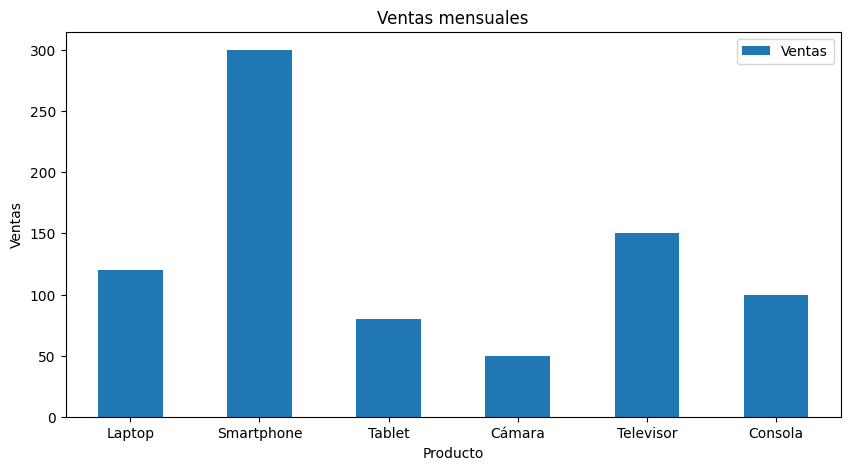

      Producto    Mes  Ventas
0       Laptop  Enero     120
12  Smartphone  Enero     300
24      Tablet  Enero      80
36      Cámara  Enero      50
48   Televisor  Enero     150
60     Consola  Enero     100


In [38]:
df = pd.read_csv("archivos_csv/ventas_mensuales.csv")

def crear_grafico(titulo,xtexto,ytexto,rotacion):
    plt.title(titulo)
    plt.xlabel(xtexto)
    plt.ylabel(ytexto)
    plt.xticks(rotation=rotacion)
    plt.show()

# Filtrando por las ventas en el mes de Enero
condicion = df["Mes"] == "Enero"
ventas_enero = df[condicion]

# Creando un gráfico de barras
ventas_enero.plot(x="Producto",y="Ventas",kind="bar",figsize=(10,5),legend=True)
crear_grafico("Ventas mensuales", "Producto", "Ventas", 0)
print(df[condicion])


          nombre  cantidad
0      Oncología         3
1    Cardiología         2
2     Neumología         2
3  Traumatología         2
4   Infectología         2


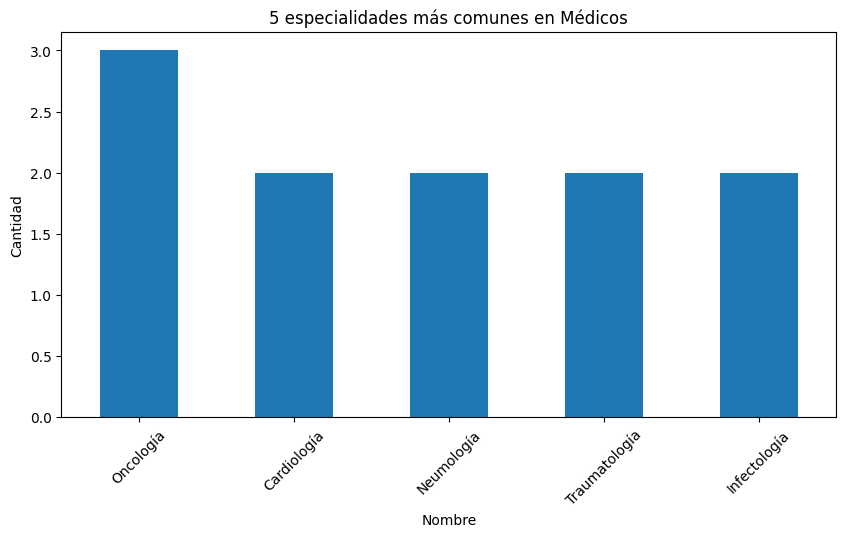

In [40]:
df1 = pd.read_csv("archivos_csv/medicos_especialidad.csv")
df2 = pd.read_csv("archivos_csv/especialidades.csv")

# Uniendo DataFrames 
df3 = pd.merge(df1,df2,on="especialidadID",how="inner")

# Contando los primeros 5 valores. 
count = df3.value_counts('nombre').head(5)
count_df = count.reset_index()
count_df.columns = ["nombre","cantidad"] # Asignamos un nombre a la columna generada por "value_counts".
print(count_df)

# Creando gráfico de barras
count_df.plot(x='nombre',y='cantidad',figsize=(10,5),kind="bar",legend=False)
plt.title("5 especialidades más comunes en Médicos")
plt.xlabel("Nombre")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

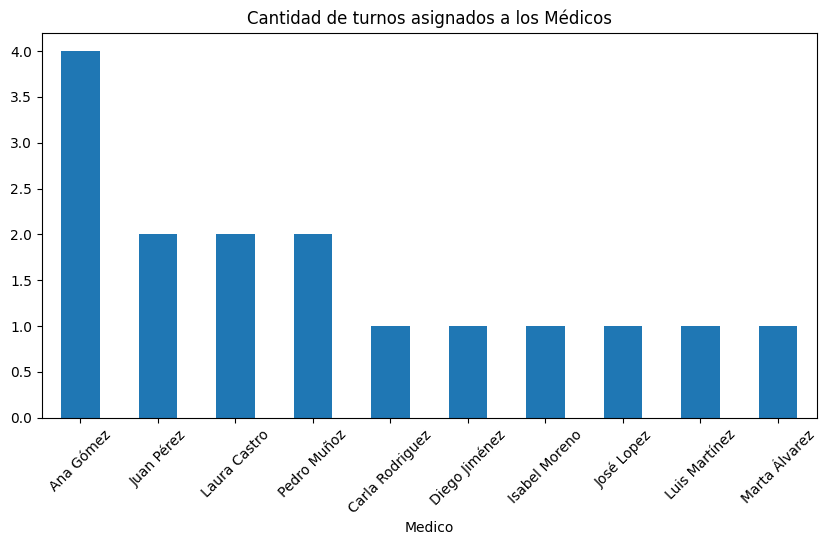

In [44]:
df1 = pd.read_csv("archivos_csv/medicos.csv")
df2 = pd.read_csv("archivos_csv/turnos.csv")

# Uniendo DataFrames
df3 = pd.merge(df1,df2,on="medicoID",how="inner")

df3["Medico"] = df3["nombre"] + " " + df3["apellido"] # Concatenando por nombre y apellido. 
df_nuevo = df3[["Medico","turnoID"]] # Obteniendo solo las columnas necesarias
df_final = df_nuevo.set_index("Medico") # Estableciendo la columna "Medico" como el nuevo indice.
count_turnos = df_final.value_counts('Medico') # Contamos la cantida de Turnos según los Médicos que coincidan.
df_count = count_turnos.reset_index()
df_count.columns = ["Medico","Cantidad de Turnos"] # Asignamos al campo generado por "value_counts" un nombre.

# Gráficamos
df_count.plot(x="Medico",y="Cantidad de Turnos",figsize=(10,5),kind="bar",legend=0)
plt.title("Cantidad de turnos asignados a los Médicos")
plt.xticks(rotation=45)
plt.show()